# Differentiation

Differentiation is not used as much as integration. This is because:

1. Derivatives of known functions can be taken analytically.

2. More difficult

### Forward and Backward differences

Standard definition of a derivative is
$$
\frac{d f}{d x}\, =\, \lim_{h\rightarrow 0} \frac{f(x+h)\, -\, f(x)}{h}
$$
But in practive we cannot take the limit $h \rightarrow 0$.

In the **forward difference** method, the derivative is approximated by

$$
\frac{d f}{d x}\, \simeq \, \frac{f(x+h)\, -\, f(x)}{h}
$$
for sufficiently small $h$. It is called forward difference because, the change in f is measured in the forward direction of x.

**Backward difference** is 

$$
\frac{d f}{d x}\, \simeq \, \frac{f(x)\, -\, f(x-h)}{h}
$$


#### Errors

To understand the error, Taylor expand $f(x + h)$ at x,
$$
f(x+h)\, =\, f(x)\, +\, h\,f'(x)\, +\, \frac{1}{2} h^2\, f''(x)\, +\, 
$$

Rearrangin the expressions we obtain, 
$$
f'(x)\, =\, \frac{f(x+h)\, -\, f(x)}{h}\, -\, \frac{1}{2}h\, f''(x)\, +\, ...
$$

Thus, the error in this case is of order $h$. This implies, if we try to make the approximation error  too small, the error will become comparable to roundoff error! So we need to find a middle ground.

1. The absolute round off error on $f(x+h)\, -\, f(x)$, in the worst case, is $2\, C\, |f(x)|$. It is based on the assumption that error on $f(x)$ and $f(x+h)$ are comparable and in the worst case they add up. Hence round off error on forward or backword difference is $2\,C\,|f(x)|/h$.

2. Approximation error is $\frac{1}{2}\,h\,|f''(x)|$.

Thus, the total error is,
$$
\epsilon\, =\, \frac{2\,C\,|f(x)|}{h}\, +\, \frac{1}{2}\, h\, |f''(x)|
$$
In order to minimize the error, we differentiate the error with respect to $h$, to obtain
$$
-\frac{2\,C\,|f(x)|}{h^2}\, +\, \frac{1}{2}\, |f(x)|\, =\, 0
$$
or equivalently
$$
h\, =\, \sqrt{4\,C\,|\frac{f(x)}{f''(x)}|}
$$
Substituting the value of h back in to the expression for $\epsilon$,
$$
\epsilon\, =\, \sqrt{4\,C\, |f(x)\, f''(x)|}.
$$
Thus, if $f(x)$  and $f''(x)$ are of ${\cal O}(1)$, then for $h\, \sim\, {\cal O}(10^{-8})$ our result will have an error of same amplitude. 

One can perform a similar analysis for backward difference method. The result will be same.

### Central Differences

A simple improvement to backward or forward difference method is 
$$
\frac{d\,f}{d\,x} \simeq \frac{f(x+h/2)\, -\, f(x - h/2)}{h}.
$$

Taylor expanding the two terms in the numerator and isolating the first derivative piece, one obtains

$$
f'(x)\, =\, \frac{f(x+h/2)\, -\, f(x - h/2)}{h}\, -\, \frac{1}{24}\, h^2\, f'''(x)\,+\, ... .
$$

**Exercise :** Derive above expression.

Taking in to account the approximation error and roundoff error, we obtain
$$
\epsilon\, =\, \frac{2\,C\,|f(x)|}{h}\, +\, \frac{1}{24}\, h^2\, |f'''(x)|.
$$

Minimizing the above error estimate one obtains
$$
h\, =\, \left( 24\,C\, \lvert \frac{f(x)}{f'''(x)}\rvert \right)^{1/3}.
$$

Using this value of $h$, the optimum error estimate is 
$$
\epsilon\, =\, \frac{h^2}{8}\, \lvert f'''(x) \rvert =\, \left( \frac{9}{8}\, C^2\, \lvert f(x) \rvert^2\,\lvert f'''(x)\rvert \right)^{1/3}
$$
Thus, for a function with $|f(x)|,\, |f'''(x)| \simeq \, {\cal O}(1)$, ideal value of $h \simeq {\cal O}(10^{-5})$ which leads to an error of $ \epsilon\, {\cal O}(10^{-10})$.

**Exercise :** Derive the expression for ideal value of $h$ and the ideal error $\epsilon$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

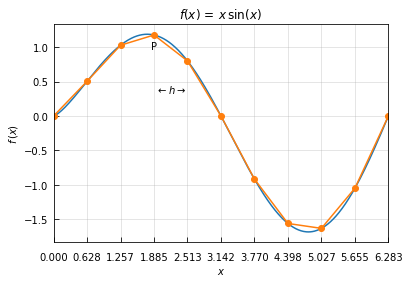

In [34]:
fig, (ax) = plt.subplots(1,1,figsize=(6,4))
x = np.linspace(0.,2.*np.pi,500)
plt.plot(x,pow(x,1./3.)*np.sin(x),linestyle='-')
x = np.linspace(0.,2.*np.pi,11)
plt.plot(x,pow(x,1./3.)*np.sin(x),linestyle='-',marker='o')
plt.xlabel(r'$x$')
plt.ylabel(r'$f\,(x)$')
plt.title(r'$f(x)\, =\, x\,\sin(x)$')
plt.xlim(0.2,1.5 * np.pi)
plt.text(0.30,0.90, r'P', horizontalalignment='center', 
         verticalalignment='center', transform=ax.transAxes)
plt.text(0.35,0.70, r'$\leftarrow h\rightarrow$', horizontalalignment='center', 
         verticalalignment='center', transform=ax.transAxes)
plt.xticks(x)
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
plt.grid(alpha=0.4)

#### Derivative of a sampled function

Consider a function sampled at few equally spaced points (see above figure). In such a case, while performing central difference, one has to use the fomula
$$
\frac{d\,f}{d\,x} \simeq \frac{f(x+h)\, -\, f(x - h)}{2\,h}.
$$
Note that, I have used $h$ instead of $h/2$. *Then, is forward difference better than central difference?* 

This can be seen as follows:

a. $\epsilon_F\, =\, \frac{h}{2}\, f''(x)$, for forward difference

b. $\epsilon_C\, =\, \frac{h^2}{2}\, f'''(x)$, for central difference

Comparing the two errors, one could write $h\, <\, \lvert f''(x)/f'''(x)\rvert$ for better accuracy with central difference.

**Note :** Note that one can use the spacing $h/2$, if we are computing the derivative at a point in the middle of two sample points spaced $h$ apart. 

**Exercise :** Compute the derivative of $1\, +\, \frac{1}{2}\tanh (2x)$ using (i) forward difference and (ii) central difference. Compare both answers with the analytical answer by plotting a graph.

### Second Derivatives

Simplest formula can be derived as follows:

Using central difference formula,
$$
f'(x\,+\,h/2)\, \simeq\, \frac{f(x\,+\,h)\, -\, f(x)}{h}\\
f'(x\,-\,h/2)\, \simeq\, \frac{f(x\,)\, -\, f(x\,-\,h)}{h}.
$$
Now apply it again to find the second derivative as
$$
f''(x)\, \simeq\, \frac{f'(x\,+\,h/2)\, -\, f'(x\, -\, h/2)}{h}\\
\implies f''(x)\, \simeq\, \frac{f(x\,+\,h)\, -\, 2\, f(x)\, +\, f(x\, -\, h)}{h^2}
$$

It has an absolute error, at leading order, of $\frac{1}{12}\, h^2\, |f''''(x)|$.

### Partial Derivatives

For a function of two varibles, $f(x,\, y)$ partial derivatives can be computed using central difference
$$
\frac{\partial f(x,\,y)}{\partial x}\, =\, \frac{f(x\,+\,h/2,\, y)\, -\, f(x\, -\, h/2,\, y)}{h}\\
\frac{\partial f(x,\,y)}{\partial y}\, =\, \frac{f(x,\, y\,+\,h/2)\, -\, f(x,\, y\, -\, h/2)}{h}\\
$$
**Exercise :** Show that 
$$
\frac{\partial^2 f(x,y)}{\partial x \partial y}\, =\, \frac{f(x\,+\,h/2,\, y\, +\, h/2)\,-\, f(x\,-\,h/2,\, y\, +\, h/2)\, -\,f(x\,+\,h/2,\, y\, -\, h/2)\,+\, f(x\,-\,h/2,\, y\, -\, h/2)\,}{h^2}
$$